# notebook to deep dive stuff

### what does a good subject t1 look like


In [1]:
import nilearn as nl
from nilearn import plotting, image, masking
import json
import numpy as np
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#with open('pilots_ru_dm_list.txt', 'r') as file:
with open('thresholded_pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]
#good_subjects_list.remove('NDARUT018UYN') #no freesurfer sub
# good_subjects_list.remove('NDARRM073JKA')#xcp straggler


# with open('good_pilots_ru_dm_list.txt', 'r') as file:
#     sub_list = file.readlines()
# good_subjects_list = [line.strip() for line in sub_list]

# good_subjects_list


In [3]:
uncertainty_list=[]
 # # # # kwyk uncertainty
for sub in good_subjects_list:
    with open(f'/om2/user/jsmentch/kwyk/{sub}_uncertainty.json', 'r') as file:
        data = json.load(file)    
    uncertainty_list.append(data['uncertainty'])
    # confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    # df = pd.read_csv(confounds_file, sep='\t')
    # metrics['Mean_FD'].append(np.mean(df['framewise_displacement']))
    # metrics['Max_FD'].append(np.max(df['framewise_displacement']))

    # loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # #loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-manualhrf_srp05_delay-0.npz')
    # metrics['R2'].append(np.mean(loaded['stacked_r2s']))

In [4]:
arousal_full_list=[]
for sub in good_subjects_list:
    arousal_full_multiplied=np.load(f'../data/features/{sub}_full_template_arousal_XCP.npy' )
    #plt.plot(zscore(arousal_full_multiplied),linewidth=0.5)
    arousal_full_list.append(zscore(arousal_full_multiplied))
#plt.plot(  np.mean(np.asanyarray(arousal_full_list),axis=0)  ,linewidth=1,c='k')

one_percent_list=[]
for sub in good_subjects_list:
    one_percent_multiplied=np.load(f'../data/features/{sub}_one_percent_arousal_XCP.npy' )
    #plt.plot(zscore(one_percent_multiplied),linewidth=0.5)
    one_percent_list.append(zscore(one_percent_multiplied))
#plt.plot(  np.mean(np.asanyarray(one_percent_list),axis=0)  ,linewidth=1,c='k')
#print(np.asanyarray(one_percent_list).shape)

### plot the T1s and uncertainty scores

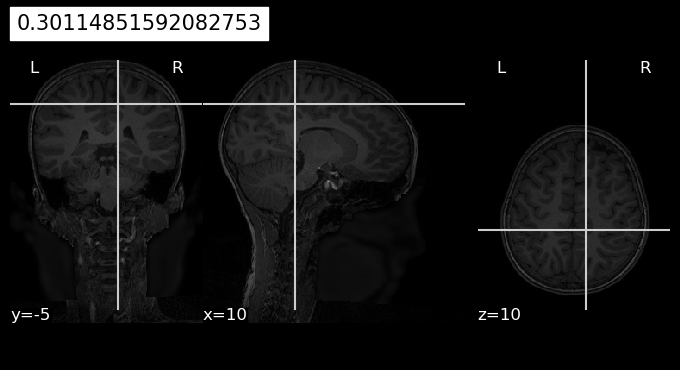

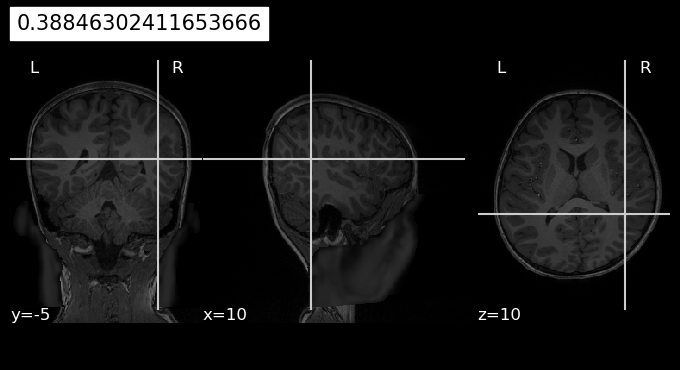

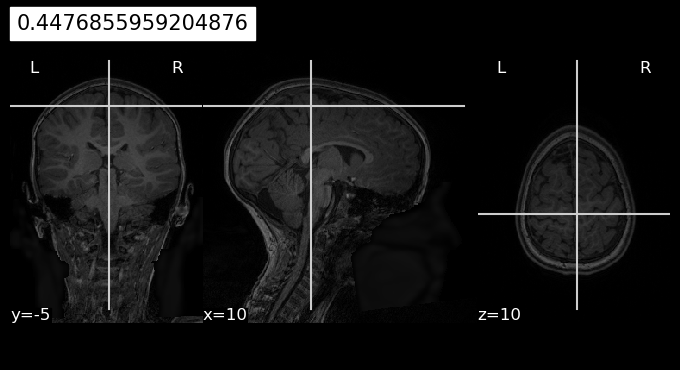

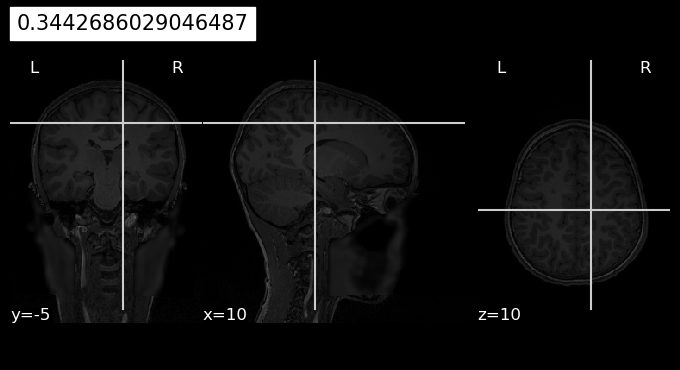

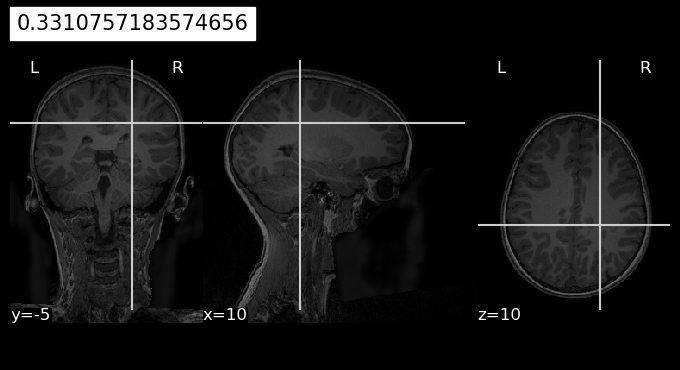

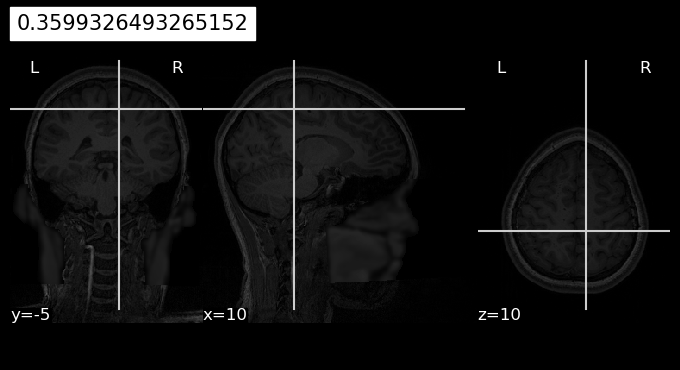

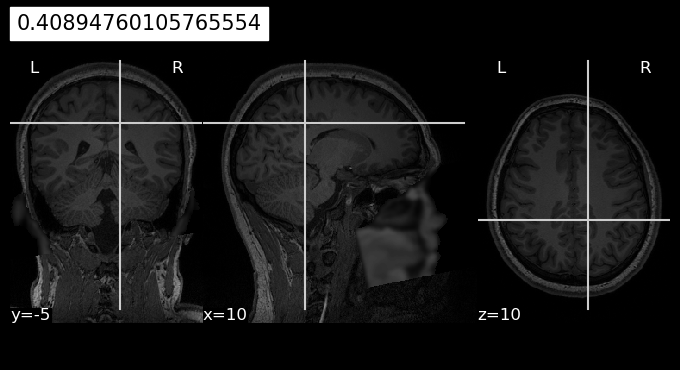

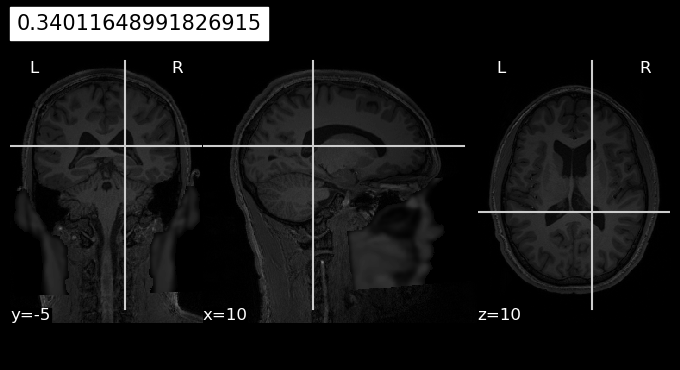

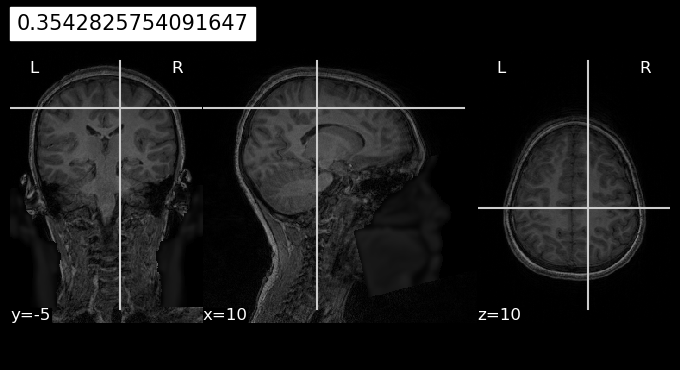

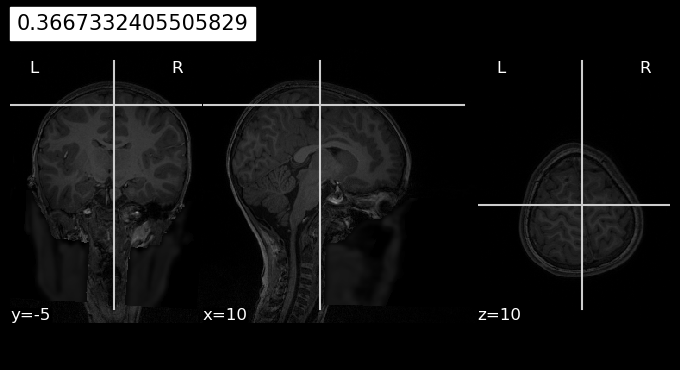

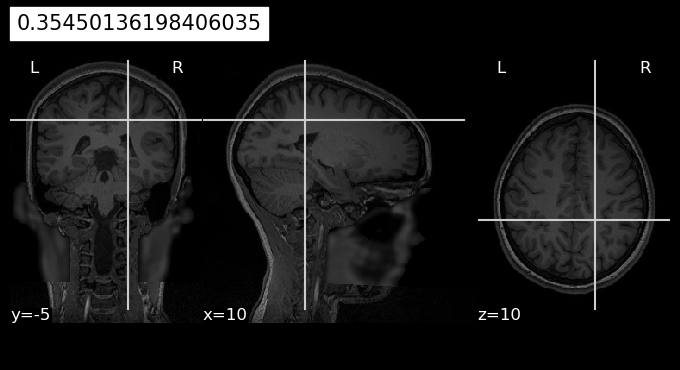

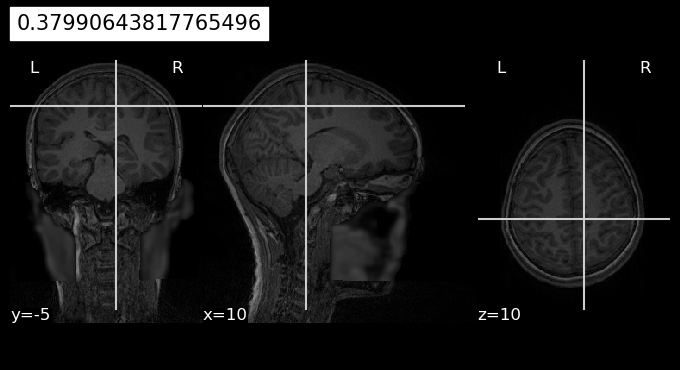

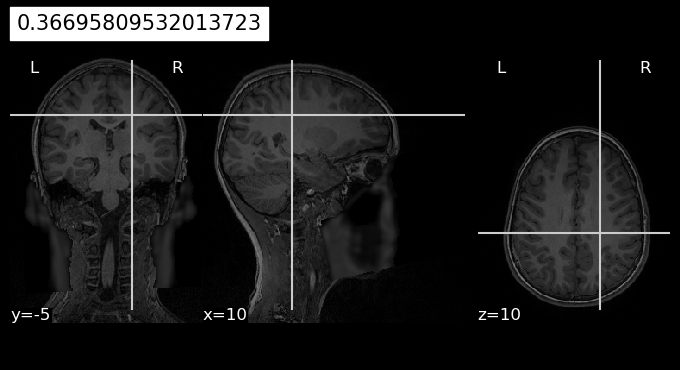

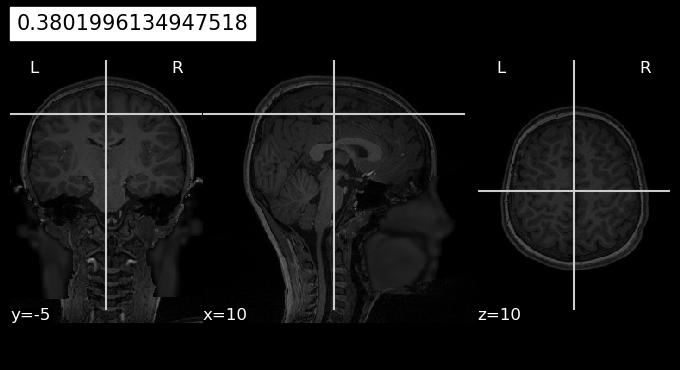

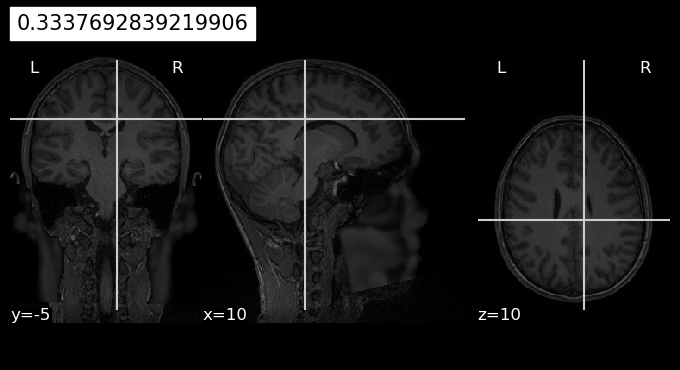

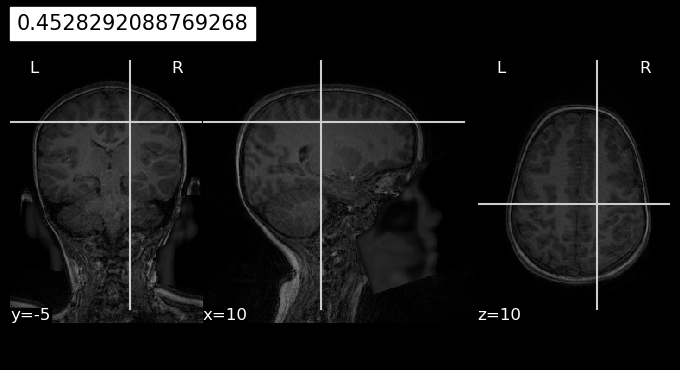

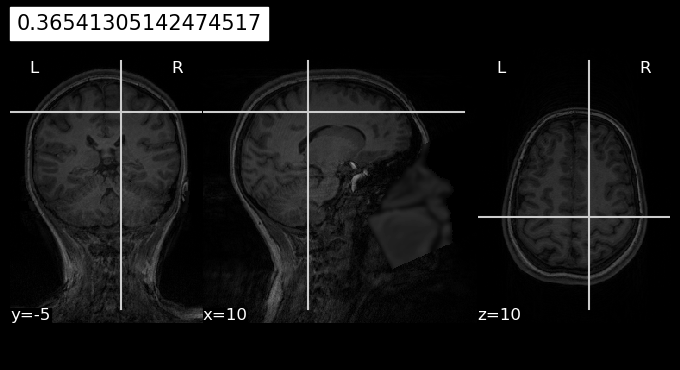

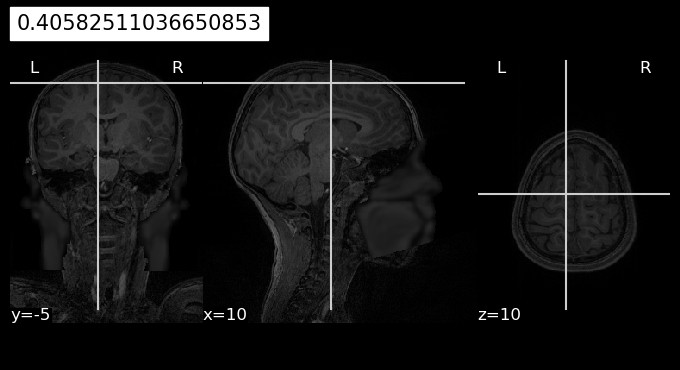

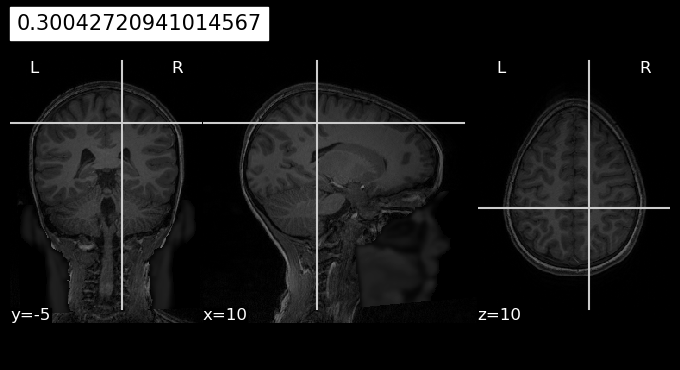

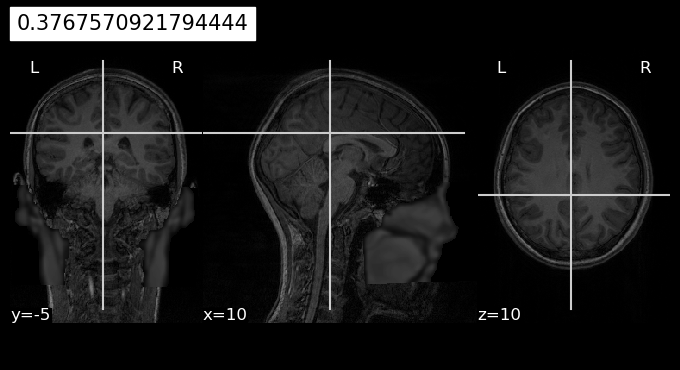

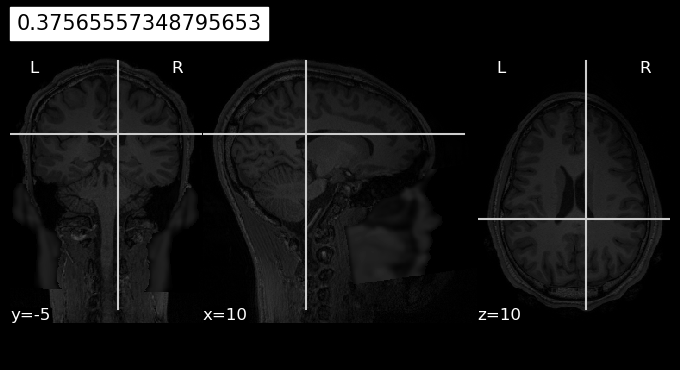

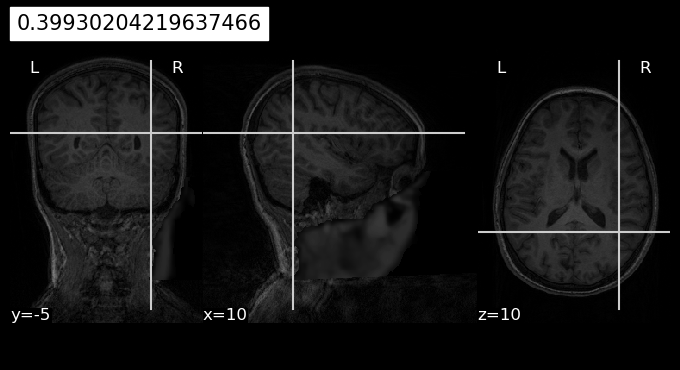

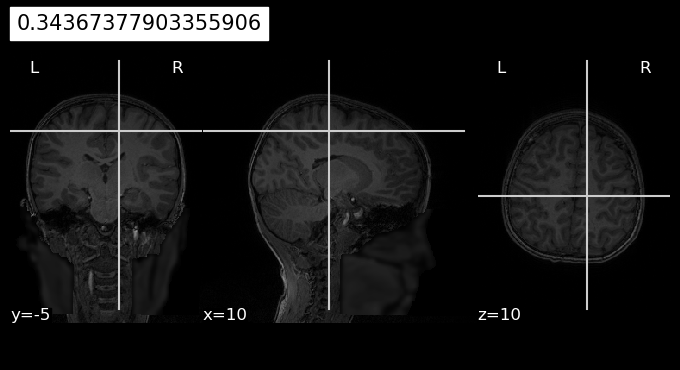

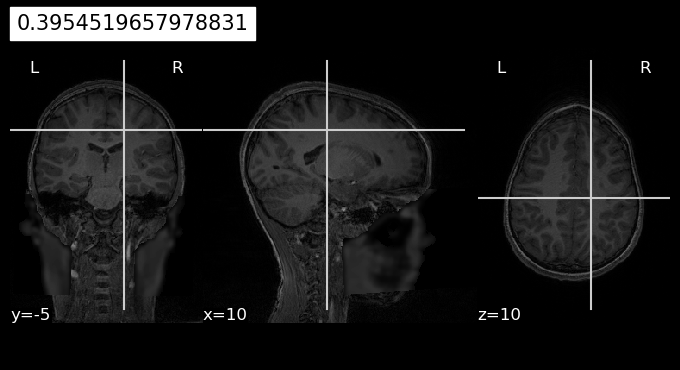

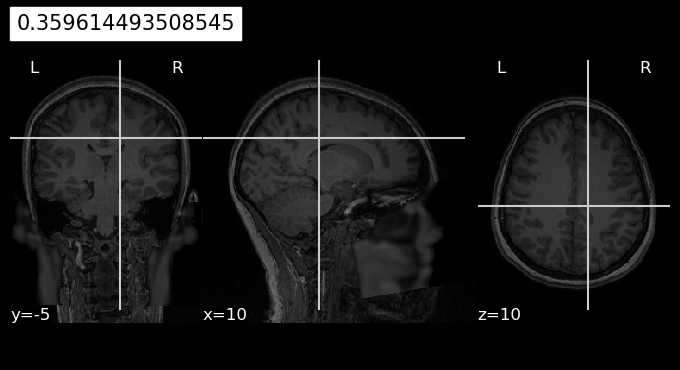

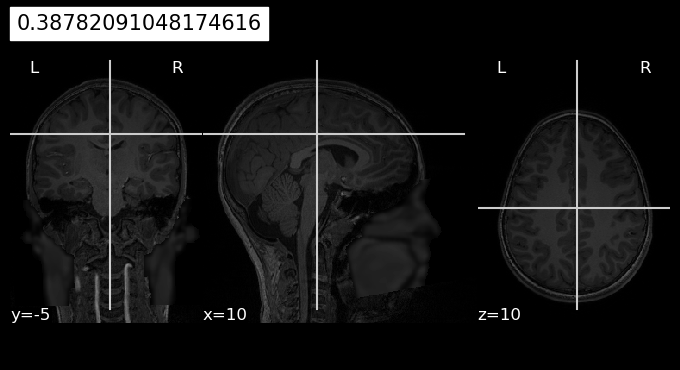

In [44]:
for i,sub in enumerate(good_subjects_list):
    try:
        t1_image = f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{sub}/ses-HBNsiteRU/anat/sub-{sub}_ses-HBNsiteRU_acq-HCP_T1w.nii.gz'
        plotting.plot_anat(t1_image,title=f'{uncertainty_list[i]}',cut_coords=(10,-5,10))
        #print(uncertainty_list[i])
    except:
        print(f'missing {sub}, skip')

### plot uncertainty maps

In [11]:
uncertainty_list=[]
 # # # # kwyk uncertainty
for sub in good_subjects_list:
    with open(f'/om2/user/jsmentch/kwyk/{sub}_uncertainty.json', 'r') as file:
        data = json.load(file)    
    uncertainty_list.append(data['uncertainty'])
    # confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    # df = pd.read_csv(confounds_file, sep='\t')
    # metrics['Mean_FD'].append(np.mean(df['framewise_displacement']))
    # metrics['Max_FD'].append(np.max(df['framewise_displacement']))

    # loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    # #loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-manualhrf_srp05_delay-0.npz')
    # metrics['R2'].append(np.mean(loaded['stacked_r2s']))

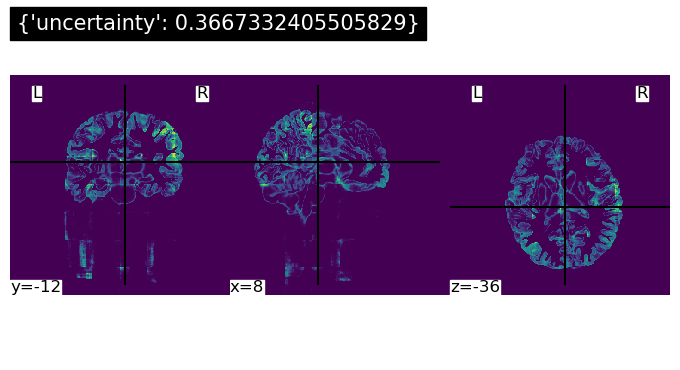

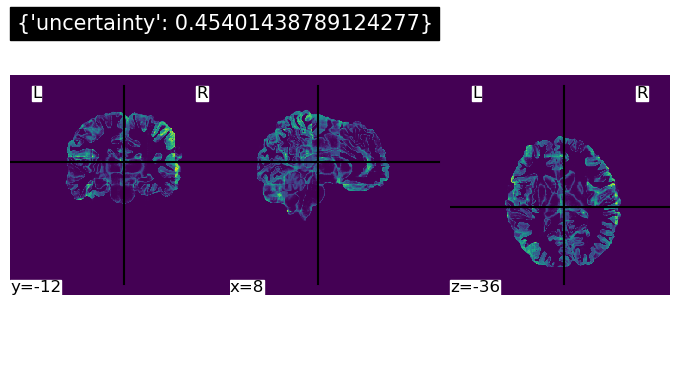

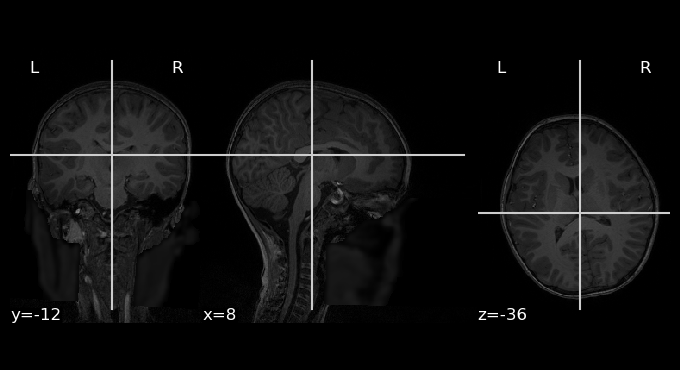

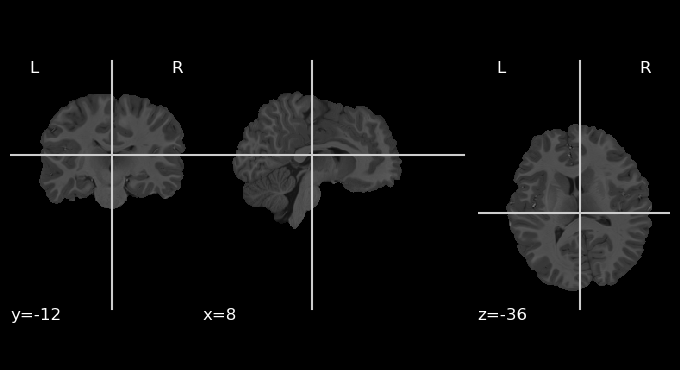

In [8]:
sub=good_subjects_list[5]
cut_coords=(8,-12,-36)
img=f'/om2/user/jsmentch/kwyk/{sub}_entropy.nii.gz'
with open(f'/om2/user/jsmentch/kwyk/{sub}_uncertainty.json', 'r') as file:
        data = json.load(file)    
plotting.plot_img(img,title=f'{data}',cut_coords=cut_coords)

with open(f'/om2/scratch/tmp/jsmentch/kwyk/output/{sub}_uncertainty.json', 'r') as file:
    data = json.load(file)   
    #print(data)
img=f'/om2/scratch/tmp/jsmentch/kwyk/output/{sub}_entropy.nii.gz'
plotting.plot_img(img,title=f'{data}',cut_coords=cut_coords)
t1_image = f'/nese/mit/group/sig/projects/hbn/hbn_bids/sub-{sub}/ses-HBNsiteRU/anat/sub-{sub}_ses-HBNsiteRU_acq-HCP_T1w.nii.gz'
plotting.plot_anat(t1_image,cut_coords=cut_coords)
t1_image = f'/om2/scratch/tmp/jsmentch/kwyk/brain_masked_t1s/sub-{sub}_masked-t1.nii.gz'
plotting.plot_anat(t1_image,cut_coords=cut_coords)

In [5]:
img_t1='/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARWW005GCU/ses-HBNsiteRU/anat/sub-NDARWW005GCU_ses-HBNsiteRU_acq-HCP_desc-preproc_T1w.nii.gz'
# plotting.plot_img(img)
img_mask='/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-NDARWW005GCU/ses-HBNsiteRU/anat/sub-NDARWW005GCU_ses-HBNsiteRU_acq-HCP_desc-brain_mask.nii.gz'
#plotting.plot_img(img)


In [9]:
img_masked=masking.apply_mask(img_t1, img_mask)
#plotting.plot_img(img_masked)


In [12]:
img_masked.shape

(2795396,)

In [17]:
t1_img = nib.load(img_t1)

# Load the mask that was used to create the 2D numpy array
mask_img = nib.load(img_mask)
masked_data = img_masked  # Replace with your actual data

# Get the data from the T1 and mask images
t1_data = t1_img.get_fdata()
mask_data = mask_img.get_fdata()

In [19]:
# Create an empty 3D array with the same shape as the T1 image
masked_t1_data = np.zeros(t1_data.shape)

# Fill the 3D array with the masked data
masked_t1_data[mask_data > 0] = masked_data

# Create a new Nifti image
masked_t1_img = nib.Nifti1Image(masked_t1_data, affine=t1_img.affine)


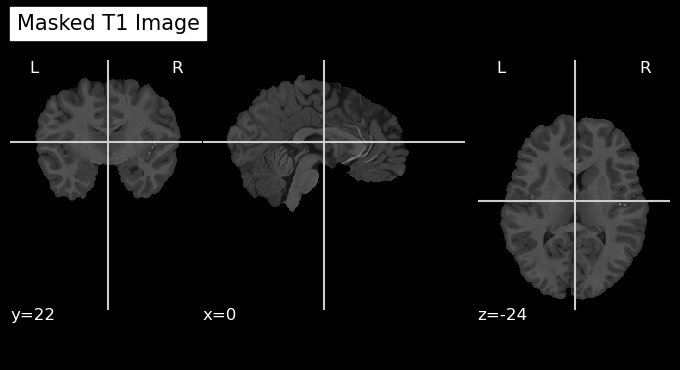

In [20]:
plotting.plot_anat(masked_t1_img, title='Masked T1 Image')
plotting.show()

In [ ]:
nb.save(masked_t1_img, 'masked_t1_img.nii.gz')

### look at the segments across the movie

In [46]:
# #re run to get r2 per cv
# for sub in good_subjects_list:
#     #print(f'SUB-{sub} NO V1******************')
#     %run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r
#     #print(f'SUB-{sub} WITH V1****************++++++')
#     #%run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r -v
#     print(f'****************++++++****************++++++****************++++++*************')

# #python pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r


In [14]:
# sub=good_subjects_list[0]
# loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
#loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-manualhrf_srp05_delay-0.npz')
#metrics['R2'].append(np.mean(loaded['stacked_r2s']))
testcv_list=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    #loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-manualhrf_srp05_delay-0.npz')
    testcv_list.append(loaded['test_r2_list'])

Text(0.5, 1.0, '$R^2$ across subjects for 10 CV folds')

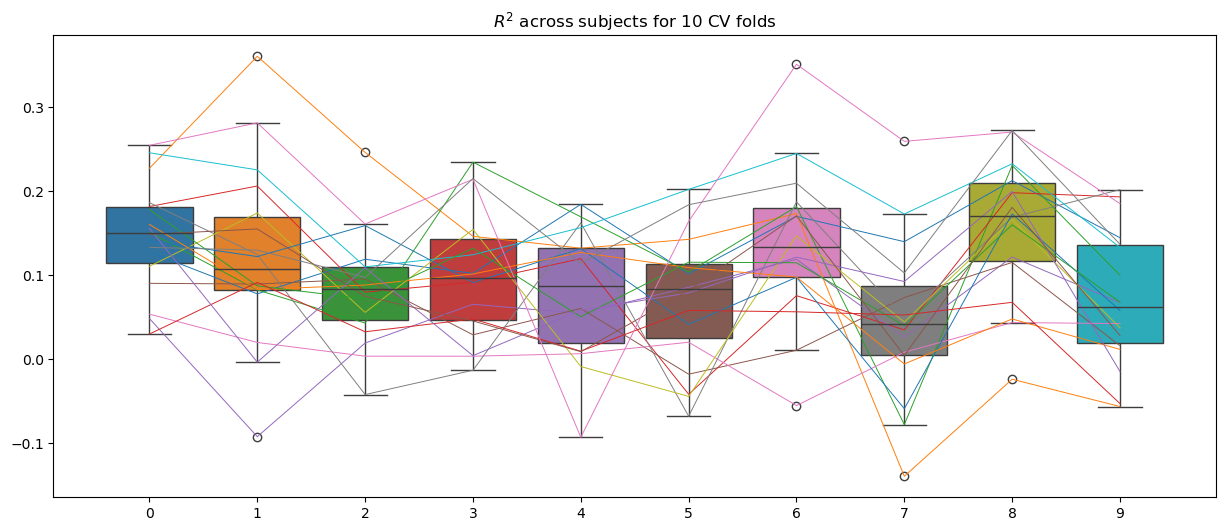

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=np.asanyarray(testcv_list))
plt.plot(np.asanyarray(testcv_list).T,linewidth=0.7)
plt.title('$R^2$ across subjects for 10 CV folds')


## calculate the arousal across the folds

In [19]:
testfd_list=[]
for sub in good_subjects_list:
    confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    df = pd.read_csv(confounds_file, sep='\t')
    data = np.asanyarray(df['framewise_displacement'])[1:]
    splits = np.array_split(data, 10)
    means = [np.mean(split) for split in splits]
    testfd_list.append(means)


In [20]:
r2=np.asanyarray(testcv_list)

In [21]:
arousal=np.asanyarray(testfd_list)

In [27]:
#np.asanyarray(arousal_full_list).shape

arousal_list=[]
for a in arousal_full_list:
    data = np.asanyarray(a)
    splits = np.array_split(data, 10)
    means = [np.mean(split) for split in splits]
    arousal_list.append(means)


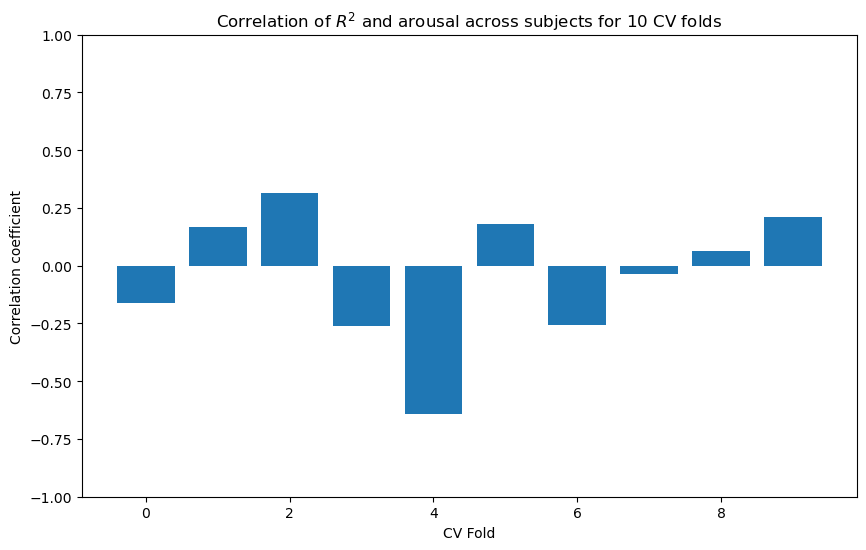

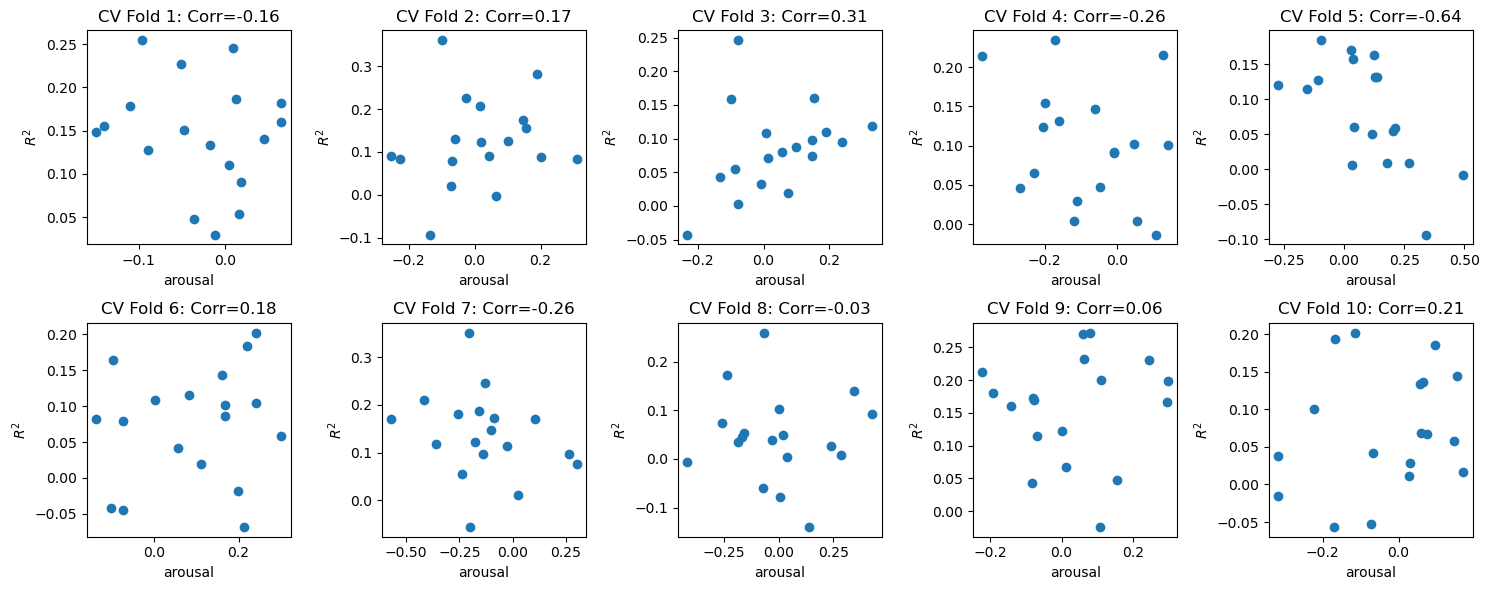

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Sample arrays
array1 = np.asanyarray(arousal_list)
array2 = r2

# Calculate correlation coefficients
correlations = np.array([np.corrcoef(array1[:, i], array2[:, i])[0, 1] for i in range(10)])

# Plot correlations
plt.figure(figsize=(10, 6))
plt.bar(range(10), correlations)
plt.xlabel('CV Fold')
plt.ylabel('Correlation coefficient')
plt.title('Correlation of $R^2$ and arousal across subjects for 10 CV folds')
plt.ylim(-1, 1)
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].scatter(array1[:, i], array2[:, i])
    axes[i].set_title(f'CV Fold {i+1}: Corr={correlations[i]:.2f}')
    axes[i].set_ylabel('$R^2$')
    axes[i].set_xlabel('arousal')

plt.tight_layout()
plt.show()


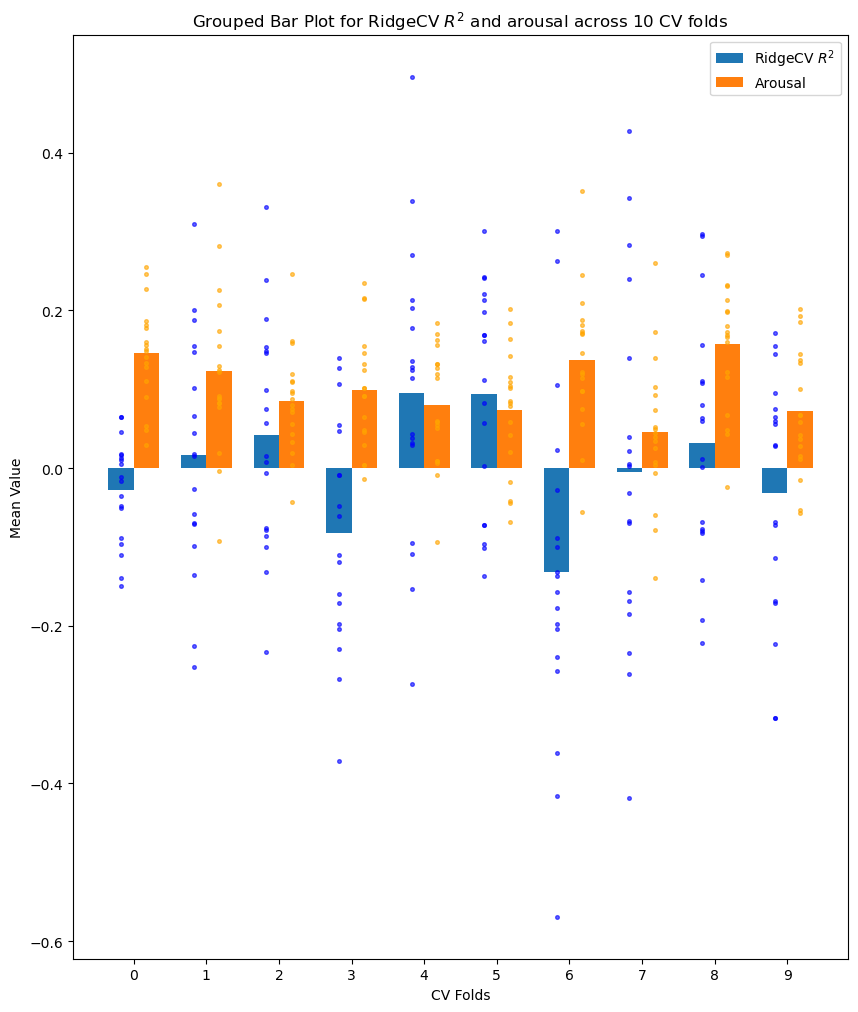

In [43]:
mean_array1 = np.mean(array1, axis=0)
mean_array2 = np.mean(array2, axis=0)

# Number of dimensions
dimensions = np.arange(10)

# Width of the bars
width = 0.35

# Create the plot
plt.figure(figsize=(10, 12))
plt.bar(dimensions - width/2, mean_array1, width, label='RidgeCV $R^2$')
plt.bar(dimensions + width/2, mean_array2, width, label='Arousal')

for i in range(10):
    plt.scatter([i - width/2] * len(good_subjects_list), array1[:, i], color='blue', alpha=0.6,s=7)

# Overlay the individual data points for Array 2
for i in range(10):
    plt.scatter([i + width/2] * len(good_subjects_list), array2[:, i], color='orange', alpha=0.6,s=7)


# Add labels and title
plt.xlabel('CV Folds')
plt.ylabel('Mean Value')
plt.title('Grouped Bar Plot for RidgeCV $R^2$ and arousal across 10 CV folds')
plt.xticks(dimensions)
plt.legend()

# Show the plot
plt.show()

### look at fd across the folds

In [36]:
testfd_list=[]
for sub in good_subjects_list:
    confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
    df = pd.read_csv(confounds_file, sep='\t')
    data = np.asanyarray(df['framewise_displacement'])[1:]
    splits = np.array_split(data, 10)
    means = [np.mean(split) for split in splits]
    testfd_list.append(means)


In [37]:
r2=np.asanyarray(testcv_list)

In [38]:
fd=np.asanyarray(testfd_list)

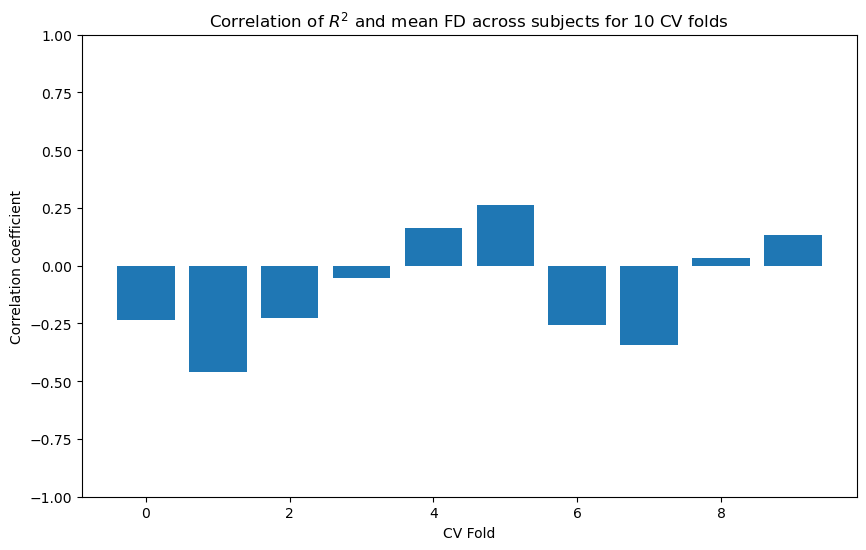

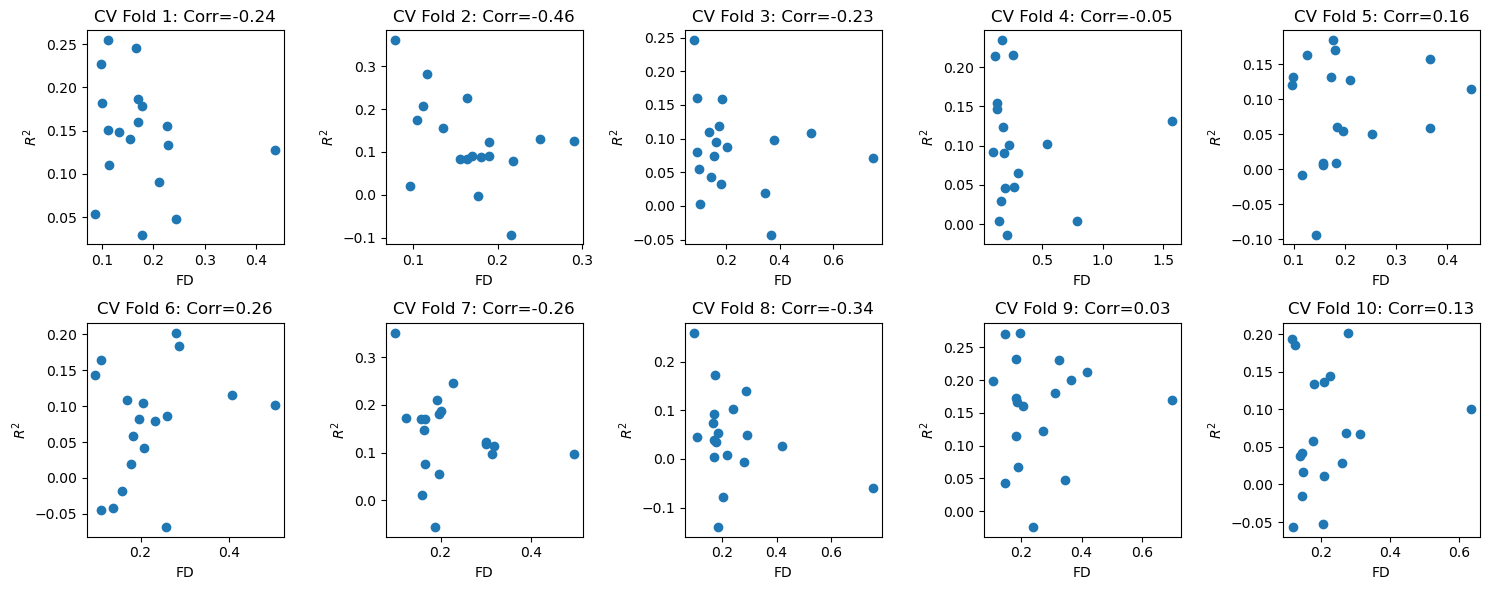

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Sample arrays
array1 = fd
array2 = r2

# Calculate correlation coefficients
correlations = np.array([np.corrcoef(array1[:, i], array2[:, i])[0, 1] for i in range(10)])

# Plot correlations
plt.figure(figsize=(10, 6))
plt.bar(range(10), correlations)
plt.xlabel('CV Fold')
plt.ylabel('Correlation coefficient')
plt.title('Correlation of $R^2$ and mean FD across subjects for 10 CV folds')
plt.ylim(-1, 1)
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].scatter(array1[:, i], array2[:, i])
    axes[i].set_title(f'CV Fold {i+1}: Corr={correlations[i]:.2f}')
    axes[i].set_ylabel('$R^2$')
    axes[i].set_xlabel('FD')

plt.tight_layout()
plt.show()


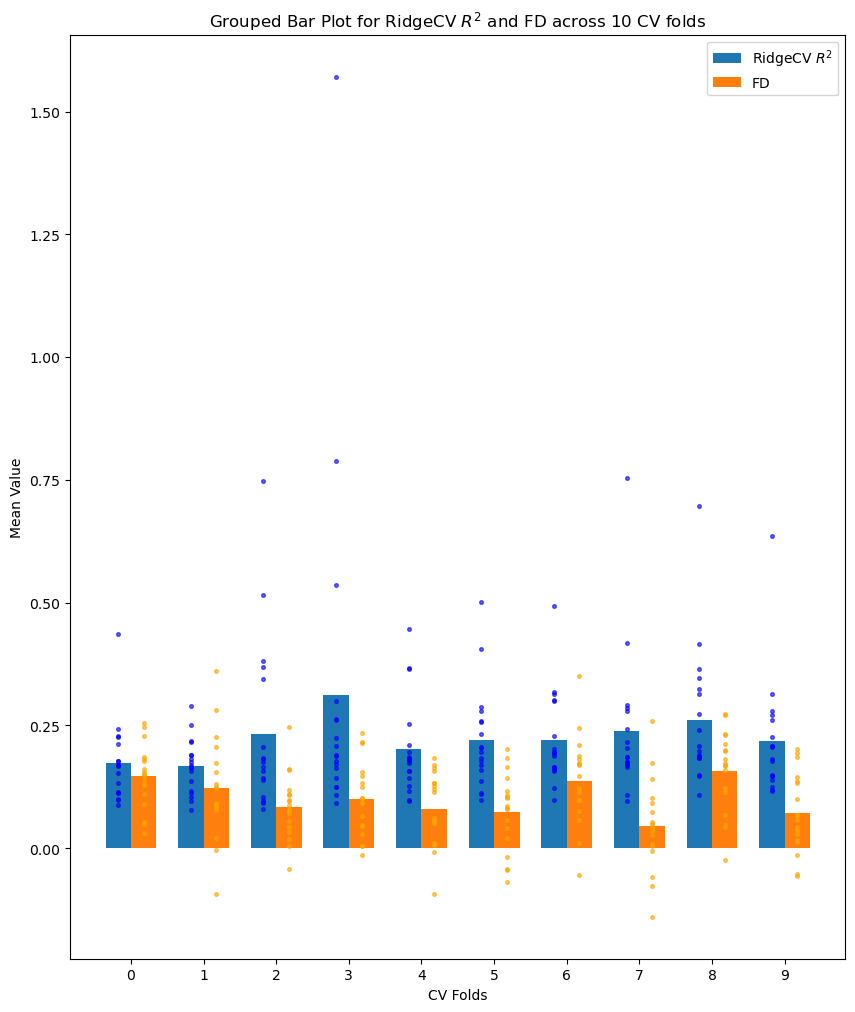

In [40]:
mean_array1 = np.mean(array1, axis=0)
mean_array2 = np.mean(array2, axis=0)

# Number of dimensions
dimensions = np.arange(10)

# Width of the bars
width = 0.35

# Create the plot
plt.figure(figsize=(10, 12))
plt.bar(dimensions - width/2, mean_array1, width, label='RidgeCV $R^2$')
plt.bar(dimensions + width/2, mean_array2, width, label='FD')

for i in range(10):
    plt.scatter([i - width/2] * len(good_subjects_list), array1[:, i], color='blue', alpha=0.6,s=7)

# Overlay the individual data points for Array 2
for i in range(10):
    plt.scatter([i + width/2] * len(good_subjects_list), array2[:, i], color='orange', alpha=0.6,s=7)


# Add labels and title
plt.xlabel('CV Folds')
plt.ylabel('Mean Value')
plt.title('Grouped Bar Plot for RidgeCV $R^2$ and FD across 10 CV folds')
plt.xticks(dimensions)
plt.legend()

# Show the plot
plt.show()

### just out of curiosity is arousal and FD related?

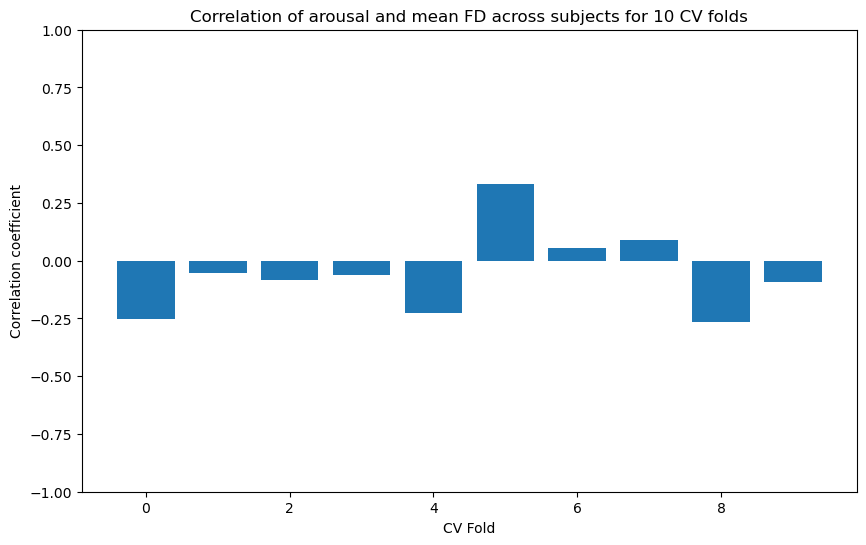

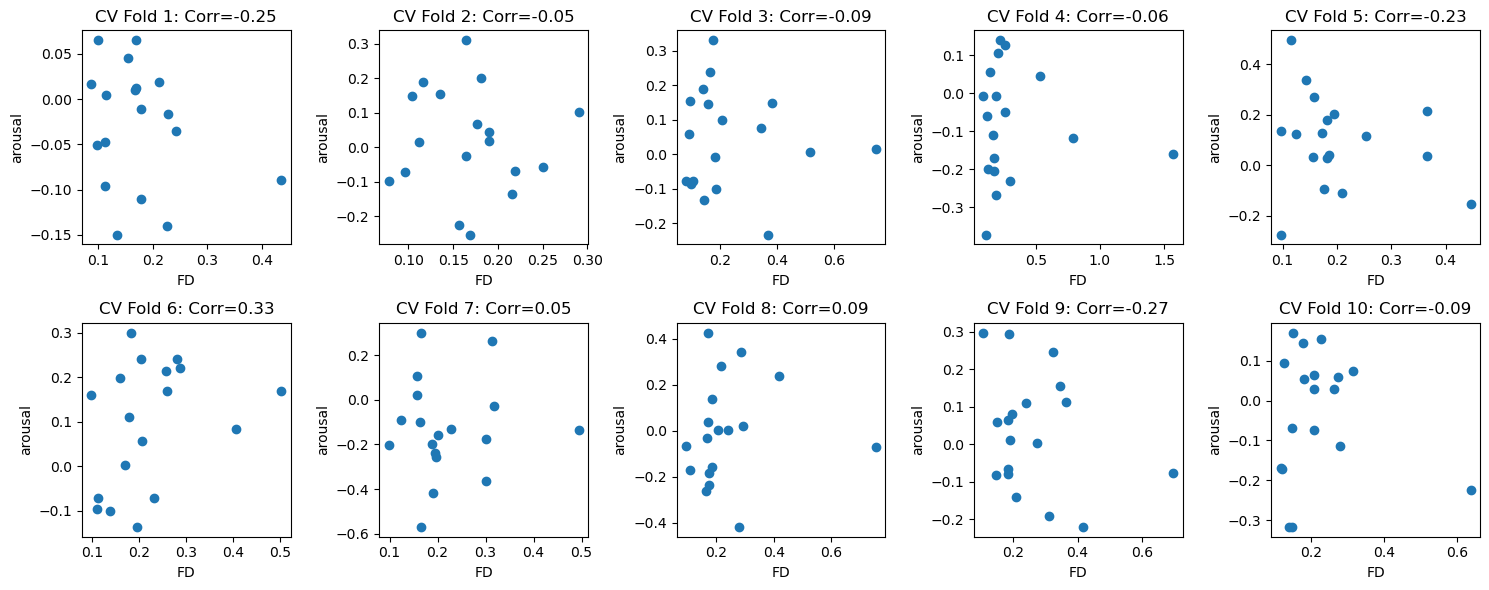

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Sample arrays
array1 = fd
array2 = np.asanyarray(arousal_list)

# Calculate correlation coefficients
correlations = np.array([np.corrcoef(array1[:, i], array2[:, i])[0, 1] for i in range(10)])

# Plot correlations
plt.figure(figsize=(10, 6))
plt.bar(range(10), correlations)
plt.xlabel('CV Fold')
plt.ylabel('Correlation coefficient')
plt.title('Correlation of arousal and mean FD across subjects for 10 CV folds')
plt.ylim(-1, 1)
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].scatter(array1[:, i], array2[:, i])
    axes[i].set_title(f'CV Fold {i+1}: Corr={correlations[i]:.2f}')
    axes[i].set_ylabel('arousal')
    axes[i].set_xlabel('FD')

plt.tight_layout()
plt.show()


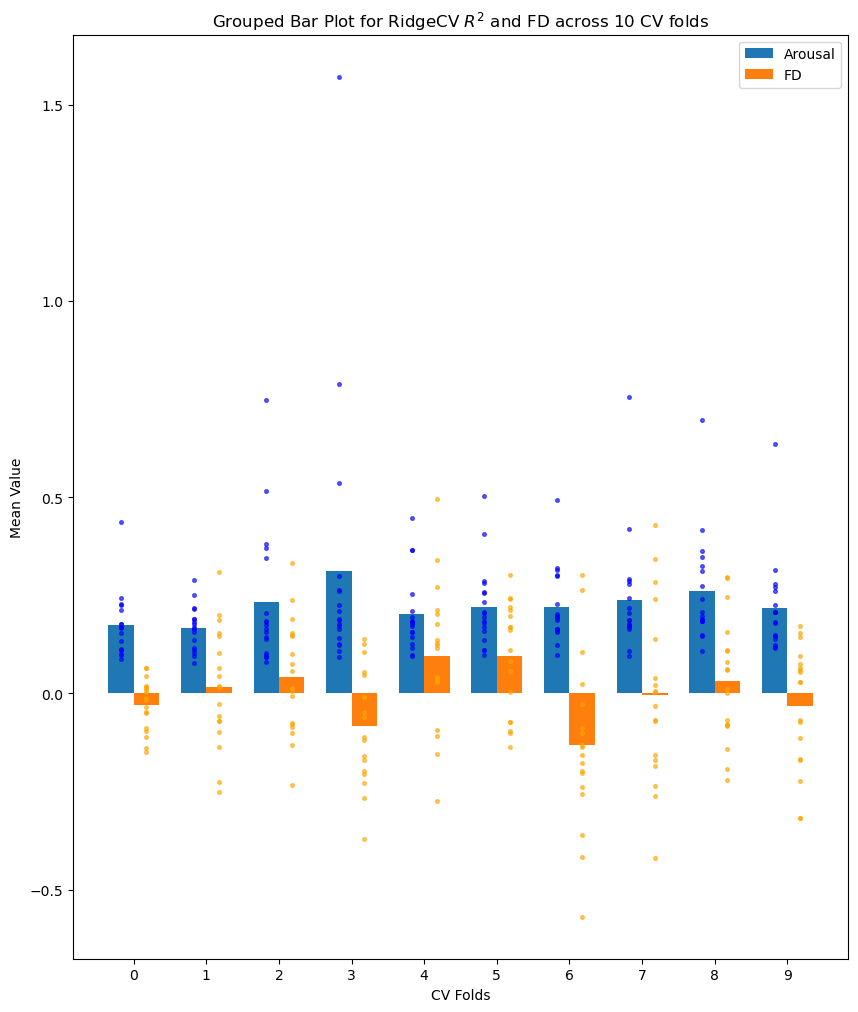

In [47]:
mean_array1 = np.mean(array1, axis=0)
mean_array2 = np.mean(array2, axis=0)

# Number of dimensions
dimensions = np.arange(10)

# Width of the bars
width = 0.35

# Create the plot
plt.figure(figsize=(10, 12))
plt.bar(dimensions - width/2, mean_array1, width, label='Arousal')
plt.bar(dimensions + width/2, mean_array2, width, label='FD')

for i in range(10):
    plt.scatter([i - width/2] * len(good_subjects_list), array1[:, i], color='blue', alpha=0.6,s=7)

# Overlay the individual data points for Array 2
for i in range(10):
    plt.scatter([i + width/2] * len(good_subjects_list), array2[:, i], color='orange', alpha=0.6,s=7)


# Add labels and title
plt.xlabel('CV Folds')
plt.ylabel('Mean Value')
plt.title('Grouped Bar Plot for RidgeCV $R^2$ and FD across 10 CV folds')
plt.xticks(dimensions)
plt.legend()

# Show the plot
plt.show()